# Car prices dataset collected from used cars advertisements.It contains these variables:

manufacturer_name: the name of the car manufacturer

transmission: type of car transmission

color: the car's body color

odometer_value: how many kilometers are recorded on the car

year_produced: the year the car has been produced

engine_fuel: car engine's fuel type

engine_type: car engine's type

engine_capacity: the capacity of the engine in liters

body_type: car body's type

has_warranty: does the car have warranty?

ownership: new/owned/emergency. emergency means the car has been damaged 
previously severly.

type_of_drive: front/rear/all type of drive

is_exchangeable: if True, the owner of the car is willing to exchange the car with other cars

number_of_photos: the number of photos the car's advertisement contains

number_of_maintenance: the number of times the car has been repaired or serviced

duration_listed: the number of days the car's advertisement is listed

price_usd: the price of the car in the advertisement. The label to predict

# Exploratory Data Analysis.

### Import libraries.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
plt.style.use("ggplot") # to show beautiful style

### Load Data.

In [2]:
train = pd.read_csv("/content/Data_train.csv")
test = pd.read_csv("/content/Data_test.csv")

In [ ]:
train.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


In [ ]:
def row_columns(data,type):
    print(type)
    print(f"rows: {data.shape[0]}")
    print(f"columns: {data.shape[1]}")

In [ ]:
row_columns(train,"train")
row_columns(test, "test")

train
rows: 50000
columns: 17
test
rows: 27000
columns: 17


The dataset was divided into two sets.
1.   Train set.

2.   Test set.

Train set has 50000 rows and 17 columns and test set has 27000 rows and 17 columns.  

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   manufacturer_name      50000 non-null  object 
 1   transmission           50000 non-null  object 
 2   color                  50000 non-null  object 
 3   odometer_value         50000 non-null  int64  
 4   year_produced          50000 non-null  int64  
 5   engine_fuel            50000 non-null  object 
 6   engine_type            50000 non-null  object 
 7   engine_capacity        49985 non-null  float64
 8   body_type              50000 non-null  object 
 9   has_warranty           50000 non-null  bool   
 10  ownership              50000 non-null  object 
 11  type_of_drive          50000 non-null  object 
 12  is_exchangeable        50000 non-null  bool   
 13  number_of_photos       50000 non-null  int64  
 14  number_of_maintenance  50000 non-null  int64  
 15  du

In [ ]:
object_columns = list(train.columns[train.dtypes==object])
bool_columns = list(train.columns[train.dtypes==bool])
float_columns = list(train.columns[train.dtypes==float])
int_columns = list(train.columns[train.dtypes==int])

pd.DataFrame({"object":len(object_columns), "bool":len(bool_columns),
              "float":len(float_columns), "int":len(int_columns)}, index=["number of columns"])

,object,bool,float,int
number of columns,8,2,2,5


There are different types in the dataset.

*   Nine object(string) columns, Two boolean columns, Two float(numrical) and five integer in the data.

In [ ]:
train.describe()

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,50000.000000,50000.000000,49985.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,249219.881980,2002.945620,2.056894,9.662420,16.256940,80.739440,6654.891274
std,136361.343789,8.067141,0.675106,6.145263,41.537349,113.606476,6467.096697
min,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,1.000000
25%,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,8990.000000
max,1000000.000000,2019.000000,8.000000,86.000000,1273.000000,2232.000000,50000.000000


Descriptive statistics.
 
*   The columns has different ranges or scale.
*   the max values of **Engine capacity**,  **Number of maintenance**, **Duration listed** and **Price usd** are far away form their data and other statistics like mean and standard devition. this means that there are outliers in these columns.

In [ ]:
pd.DataFrame({"columns":list(train.dtypes.index),"types":list(train.dtypes.values),
              "nunique_values":list(train.nunique().values)})

,columns,types,nunique_values
0,manufacturer_name,object,55
1,transmission,object,2
2,color,object,12
3,odometer_value,int64,5455
4,year_produced,int64,63
5,engine_fuel,object,6
6,engine_type,object,3
7,engine_capacity,float64,61
8,body_type,object,12
9,has_warranty,bool,2


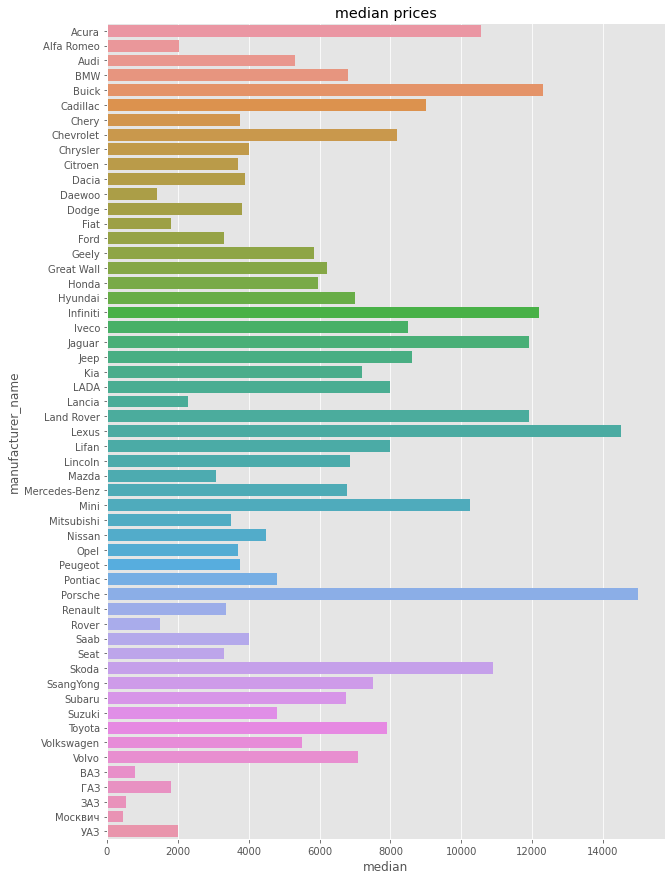

In [ ]:
plt.figure(figsize=(10,15))
med_gro =train.groupby("manufacturer_name")["price_usd"].median()
sns.barplot(x = med_gro.values,
            y = med_gro.index)
plt.xlabel("median")
plt.title("median prices")     
plt.show()       

The companies that make cars have an impact on the target.because the differences in prices between cars.

for example, **Москвич** company is cheapest while **BMW** is the most expesive and the difference is quite big.

As we see below.

In [ ]:
pd.DataFrame({"Москвич":med_gro.min(),"BMW":med_gro.max()}, index=["median value"])

,Москвич,BMW
median value,447.125,15000.0


In [ ]:
obj = [col for col in object_columns if col!="manufacturer_name"] + bool_columns
plt.figure(figsize=(25,20))
for i,col in enumerate(obj):
    med = train.groupby(col)["price_usd"].median()
    plt.subplot(5,2,i+1)
    sns.barplot(x=med.index, y=med.values )
    plt.ylabel("median");        

Each class in any Categorical Column has different average price from other in all object_columns.

In [ ]:
plt.figure(figsize=(20,15))
for i,col in enumerate(float_columns + int_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(train[col],bins=25)

In [ ]:
# to compute skewness in the train set
train[float_columns + int_columns].skew().to_frame().T

the flaot columns are not normal and the shewness in the data is big.

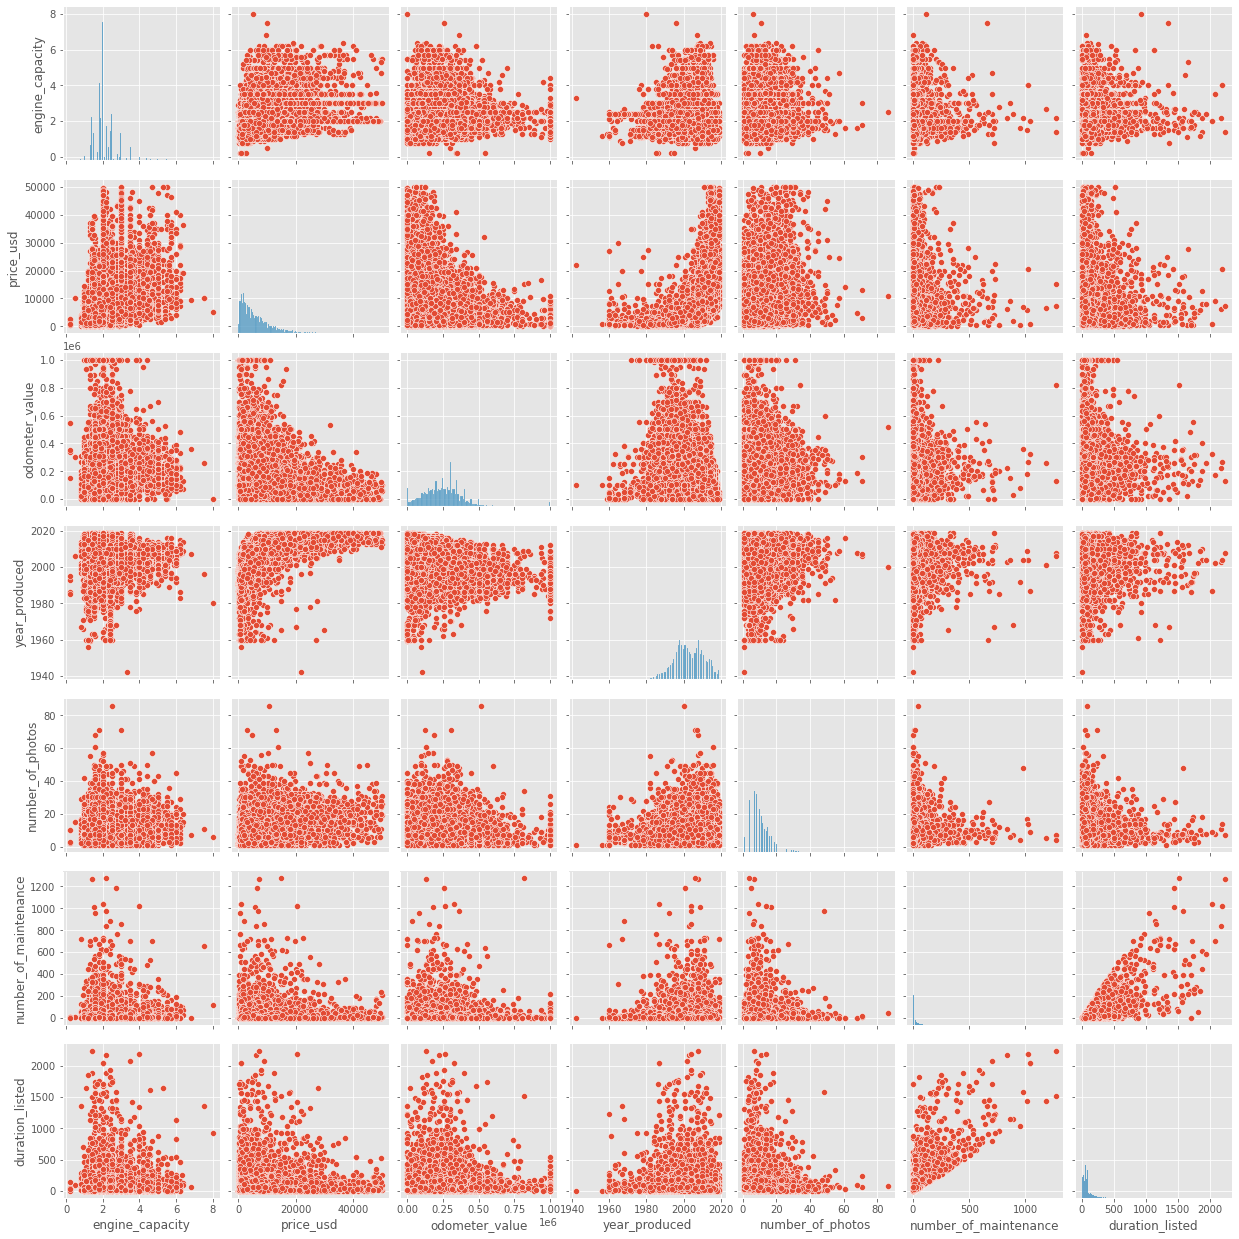

In [ ]:
sns.pairplot(train[float_columns+int_columns])
plt.show()

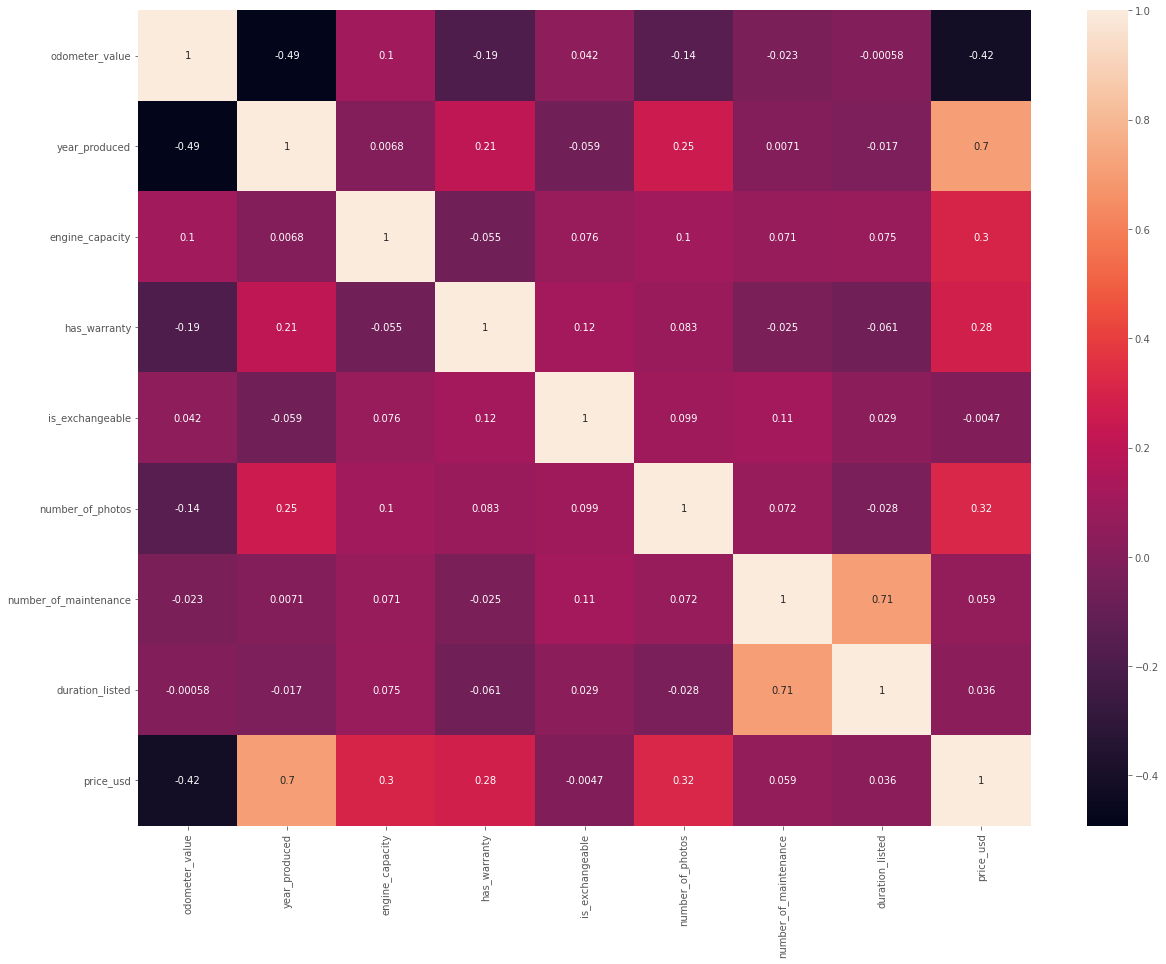

In [ ]:
corr_matrix = train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True);

In [ ]:
corr_matrix['price_usd'].sort_values(ascending=False)

price_usd                1.000000
year_produced            0.704611
number_of_photos         0.316824
engine_capacity          0.301269
has_warranty             0.277273
number_of_maintenance    0.058815
duration_listed          0.035704
is_exchangeable         -0.004681
odometer_value          -0.422072
Name: price_usd, dtype: float64

Show correlations between the **target** variable and **features**:

*   strong correlations between price_usd and year_produce, odometer_value,  number_of_photos, engine_capacity and has_warranty.  
*   weak correlations between price_usd and number_of_maintenanc, duration_listed, is_exchangeable.

In [ ]:
train.isnull().sum()

manufacturer_name         0
transmission              0
color                     0
odometer_value            0
year_produced             0
engine_fuel               0
engine_type               0
engine_capacity          15
body_type                 0
has_warranty              0
ownership                 0
type_of_drive             0
is_exchangeable           0
number_of_photos          0
number_of_maintenance     0
duration_listed           0
price_usd                 0
dtype: int64

the engine_capacity column in the data has 15 missing values.

In [ ]:
pre_train = train.copy()
median = train['engine_capacity'].median() 
pre_train['engine_capacity'] = train['engine_capacity'].fillna(median) 

Replace missing values with median value.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

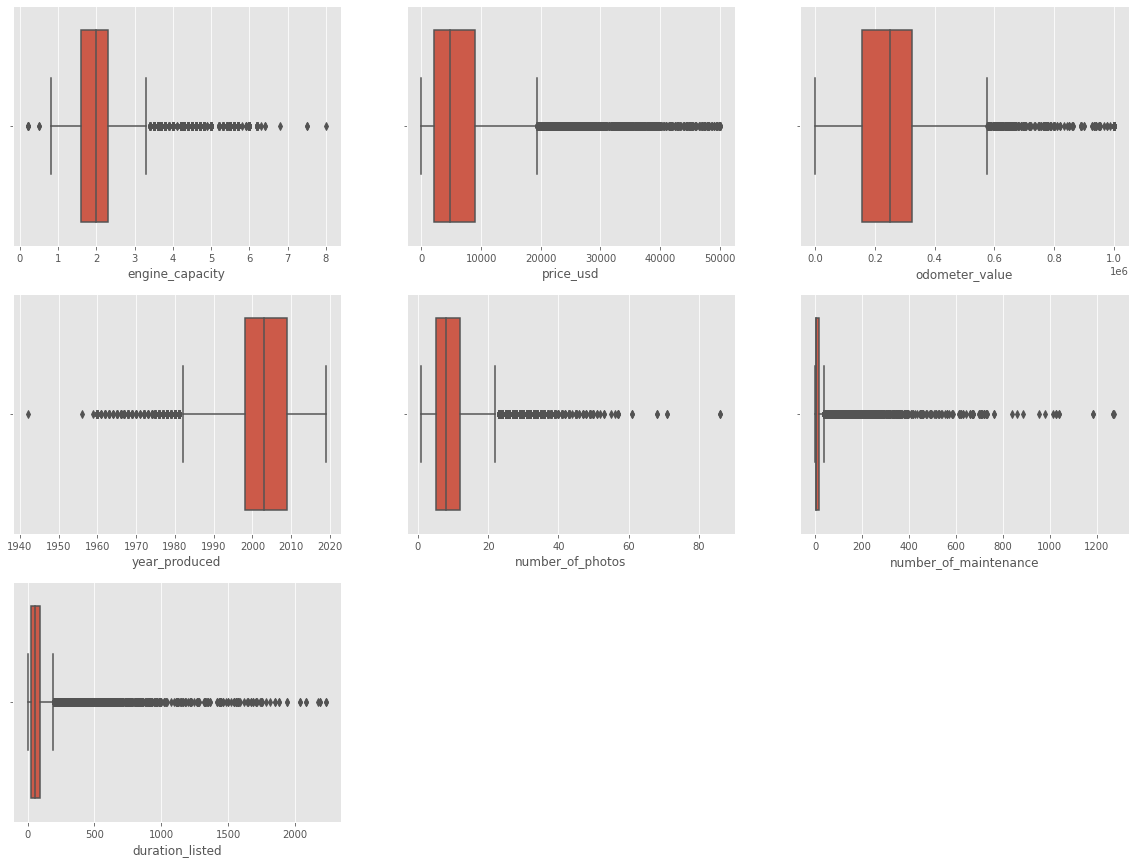

In [ ]:
plt.figure(figsize=(20,15))
for i,col in enumerate(float_columns+int_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(pre_train[col])

Show outliers in the data.

In [ ]:
def compute_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    max_limit = q3 + 1.5 * iqr
    min_limit = q1 - 1.5 * iqr
    return [data for data in df if data > max_limit or data < min_limit]

def ratio_of_outliers(df):
    return len(compute_outliers(df))/len(df)


dic = {} # to create empty dictionary 

for col in (float_columns+int_columns):
    dic[col] =  ratio_of_outliers(pre_train[col])
    pre_train[col] = pre_train[col].replace(compute_outliers(pre_train[col]),
                                    pre_train[col].median())
                                   

pd.DataFrame(dic,index=['ratio_of_outliar'])

,engine_capacity,price_usd,odometer_value,year_produced,number_of_photos,number_of_maintenance,duration_listed
ratio_of_outliar,0.05256,0.04618,0.01456,0.00598,0.04086,0.10064,0.07038


The ratio of outlier in the data is considered small and is not a real part of the data.

# Data preprocessing.

### Features Engineering.

In [ ]:
pre_train['odometer_value_per_year_produced'] = pre_train['odometer_value']/pre_train['year_produced']
pre_train['duration_listed_number_of_photos'] = pre_train['duration_listed']/pre_train['number_of_photos']

In [ ]:
corr_matrix = pre_train.corr()
corr_matrix['price_usd'].sort_values(ascending=False)

price_usd                           1.000000
year_produced                       0.730627
number_of_photos                    0.239993
engine_capacity                     0.152858
has_warranty                        0.116222
number_of_maintenance               0.045630
duration_listed                     0.015688
is_exchangeable                    -0.047071
duration_listed_number_of_photos   -0.074818
odometer_value                     -0.381737
odometer_value_per_year_produced   -0.385155
Name: price_usd, dtype: float64

duration_listed_number_of_photos and odometer_value_per_year_produced are are new features.

*  odometer_value_per_year_produced has a strong correlation with target variable.
*  duration_listed_number_of_photos has a weak correlation with target.




In [ ]:
pre_train.drop("duration_listed_number_of_photos", axis=1, inplace=True) # has a weak correlation.

### features transformations.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_columns = object_columns + bool_columns 

label_en = LabelEncoder()
ohe = OneHotEncoder(sparse=False, drop="first") # drop first for collinear problems.
scaler = StandardScaler()

pre_train[cat_columns] = pre_train[cat_columns].apply(label_en.fit_transform) # transform categorical columns to numerical columns.
ohe_variable = ohe.fit_transform(pre_train[object_columns]) # transform categorical columns to one hot encoder columns.
ohe_frame = pd.DataFrame(ohe_variable)
pool_frame = pre_train[bool_columns]
train_cat = pd.concat([pool_frame, ohe_frame], axis=1)

train_num = pre_train.drop(cat_columns, axis=1) # drop object columns
scaled_train = scaler.fit_transform(train_num) # Features scalling.

train_tr = pd.concat([pd.DataFrame(scaled_train, columns=train_num.columns),
                      train_cat], axis=1) 

train_tr

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd,odometer_value_per_year_produced,has_warranty,is_exchangeable,...,78,79,80,81,82,83,84,85,86,87
0,-0.954528,1.668661,-0.786142,1.745263,-0.314222,0.182039,1.746584,-0.959769,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.791277,1.150364,-0.786142,0.033915,-0.559158,0.946130,0.437284,-0.795725,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.126372,1.409512,-0.786142,-0.821759,0.298115,0.737742,1.526436,-1.128868,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.120353,0.502494,-0.331661,0.247833,-0.436690,0.737742,-0.153639,0.113476,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.076533,-0.534099,0.122819,-0.821759,-0.069287,0.066268,-0.605521,0.078469,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.193516,-0.922822,-0.786142,-1.463515,-0.681625,-0.003195,-0.489654,1.197941,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
49996,0.602486,-1.181970,-0.331661,1.317426,-0.069287,-0.697823,-0.640281,0.609979,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
49997,0.076533,-0.534099,-0.331661,-0.393922,0.665518,1.131364,-0.837255,0.078469,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
49998,0.076533,-0.663673,1.259019,0.247833,2.257597,0.112577,-0.123513,0.079541,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Pipeline for data.

**pipeline for features**.

*   For **Numerical Columns** :
             1. Fill Nan values. 
             2. Remove outliers values.
             3. Features Engineering(add aditional features).
             4. Features Scaling.

*   For **categorical columns** :
             1. Transform categorical into numbers.
             2. Apply One Hot Encoding.

**pipeline for target**.

1. Remove outliers values.
2. scaling by standard scaling.



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin #gives fit_transform method for free

# features engineering.
odometer_value_ix, year_produced_ix, number_of_photos_ix, duration_listed_ix = [
    i for i, col in enumerate(train.columns) if col in 
    ["odometer_value", "year_produced", "number_of_photos", "duration_listed"]]

class CombinedAttributesAdder(TransformerMixin): 
    def __init__(self, add_duration_listed_number_of_photos=False):
        self.add_duration_listed_number_of_photos = add_duration_listed_number_of_photos
    def fit(self, X, y=None):
        return self # nothing else to do    
    def transform(self, X):
        odometer_value_per_year_produced = X[:, odometer_value_ix]/X[:, year_produced_ix]
        if self.add_duration_listed_number_of_photos:
            duration_listed_number_of_photos = X[:, duration_listed_ix]/X[:, number_of_photos_ix]
            return np.c_[X, odometer_value_per_year_produced,
                         duration_listed_number_of_photos]
        else :
            return np.c_[X, odometer_value_per_year_produced] 

# to transform all categorical variables into numerical variables.
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)   

# to remove outlier values in all variables.
class outlier:
    def __init__(self, columns = None):
        self.columns = columns  # select specific columns. 

    def fit(self, X, y=None):
        return  self # nothing else to do.

    def transform(self, X):
    
        def compute_outliers(df): 
            q1 = df.quantile(0.25)
            q3 = df.quantile(0.75)
            iqr = q3 - q1
            max_limit = q3 + 1.5 * iqr
            min_limit = q1 - 1.5 * iqr
            return [data for data in df if data > max_limit or data < min_limit]
     
        if self.columns is not None :
            output = pd.DataFrame(X.copy(), columns=self.columns)
            for col in self.columns:
                output[col] = output[col].replace(compute_outliers(output[col]),
                                                  output[col].median())
        else :
            output = pd.DataFrame(X.copy())
            for col in output.columns:
                output[col] = output[col].replace(compute_outliers(output[col]),
                                                  output[col].median())                             
        return np.array(output)

    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)  
              
# first piipeline for missing values, features engineering and scaler.           
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("outlier", outlier()),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

# second pipeline transform categorical to numerical.
cat_pipeline = Pipeline([
    ("label_encoder", MultiColumnLabelEncoder()),
    ("one_hot_encoder", OneHotEncoder(sparse=False, drop="first")) # drop first for collinear problems.
])

num_features = [float_columns[0]] + int_columns # select all numerical variables without target.
cat_features = bool_columns + object_columns

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features),
])

# this pipeline for just target.
target_pipeline = Pipeline([
    ("outlier", outlier()),
    #("std_scaler", StandardScaler()) 
])


In [ ]:
X_train = full_pipeline.fit_transform(train)   
X_test = full_pipeline.transform(test)   

target = "price_usd"
y_train = target_pipeline.fit_transform(train[target])
y_test = target_pipeline.transform(test[target])

### Select and Train a Model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
model = [LinearRegression(),   
         Ridge(),  
         Lasso(),   
         ElasticNet(),   
         KNeighborsRegressor(), 
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=10), 
         AdaBoostRegressor(),
         GradientBoostingRegressor(),
         xg.XGBRegressor(objective ='reg:linear')]

def print_scores(scores):
    print(f"scores: {scores}")
    print(f"mean of scores: {np.mean(scores)}")
    print(f"standard deviation: {np.std(scores)}")

dic = {}
for m in model:
    scores = cross_val_score(m, X_train, y_train,
                             scoring="neg_mean_squared_error",cv=10)
    print(f"MODEL: {m}")
    sqrt_neg_scores = np.sqrt(-scores)
    print_scores(sqrt_neg_scores)
    print("----------------------")
    dic[str(m)] = np.mean(sqrt_neg_scores)

MODEL: LinearRegression()
scores: [2580.43252145 2556.44822648 2597.11882754 2542.82714165 2455.18195913
 2549.24131151 2575.12339891 2636.29563427 2606.13178746 2596.79338583]
mean of score: 2569.5594194235146
standard deviation: 46.71530753532416
----------------------
MODEL: Ridge()
scores: [2578.84821974 2556.14397172 2597.90260723 2542.61918013 2456.08294652
 2550.46474136 2575.9656068  2625.29273233 2598.48983893 2596.12264322]
mean of score: 2567.793248798168
standard deviation: 44.37962068136406
----------------------
MODEL: Lasso()
scores: [2581.18869764 2560.0277873  2604.03265473 2548.2075904  2462.64632828
 2548.68408003 2576.52560159 2629.40833817 2602.22743947 2599.05470025]
mean of score: 2571.2003217867787
standard deviation: 43.905867283018225
----------------------
MODEL: ElasticNet()
scores: [2908.48702668 2904.12100535 2931.88302338 2867.05890698 2772.77974449
 2852.67479912 2884.4018253  2938.13867713 2905.592592   2983.8246052 ]
mean of score: 2894.8962205620765
s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

MODEL: RandomForestRegressor()
scores: [1451.70039564 1375.85861585 1415.901768   1429.1941512  1339.21444608
 1404.83511702 1435.90243935 1459.89394232 1479.80623856 1456.79786921]
mean of score: 1424.9104983222758
standard deviation: 40.429120471733484
----------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

MODEL: BaggingRegressor(base_estimator=KNeighborsRegressor())
scores: [2272.13013008 2245.4595868  2290.02453707 2261.874599   2131.60524593
 2234.35266963 2246.03382443 2230.159188   2290.53853405 2298.2960067 ]
mean of score: 2250.047432168147
standard deviation: 45.71731323568025
----------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

MODEL: AdaBoostRegressor()
scores: [2746.00190706 2866.55274946 2741.59063973 2633.43727932 2688.52901623
 2622.73394603 2811.35747515 2692.65200096 2659.20759089 2679.13381825]
mean of score: 2714.119642307012
standard deviation: 73.94474492809094
----------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

MODEL: GradientBoostingRegressor()
scores: [2257.74422956 2227.88621618 2291.80540369 2208.6585468  2130.28178509
 2251.26638569 2249.97632103 2288.28382432 2276.67199633 2290.57492751]
mean of score: 2247.314963618744
standard deviation: 47.001204733392065
----------------------
[17:07:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:08:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is no

In [ ]:
pd.DataFrame(dic, index=["mean of score"]).T

,mean of score
LinearRegression(),2569.559419
Ridge(),2567.793249
Lasso(),2571.200322
ElasticNet(),2894.896221
KNeighborsRegressor(),2311.380954
DecisionTreeRegressor(),1795.124885
RandomForestRegressor(),1424.910498
BaggingRegressor(base_estimator=KNeighborsRegressor()),2250.047432
AdaBoostRegressor(),2714.119642
GradientBoostingRegressor(),2247.314964


The least mean of scores between all model is Random Forest.

Random Forest's mean of scores is **1424.910498** and Random Forest's standard deviation of scores is **40.429120471733484**.
this means Random Forest is the best model.

## Fine-Tune Model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid ={"bootstrap": [False],
             "n_estimators":[70,100,150],
             "max_features":[6,10,14,18]}


forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train,y_train)

grid_search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'bootstrap': False, 'max_features': 18, 'n_estimators': 100}

In [ ]:
cv_res = grid_search.cv_results_
for mean_score, param in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), param)

1506.5553976765184 {'bootstrap': False, 'max_features': 6, 'n_estimators': 70}
1496.2797739480916 {'bootstrap': False, 'max_features': 6, 'n_estimators': 100}
1497.2265568041078 {'bootstrap': False, 'max_features': 6, 'n_estimators': 150}
1453.3352059175531 {'bootstrap': False, 'max_features': 10, 'n_estimators': 70}
1447.2009303035957 {'bootstrap': False, 'max_features': 10, 'n_estimators': 100}
1445.3767390915314 {'bootstrap': False, 'max_features': 10, 'n_estimators': 150}
1422.8547886629094 {'bootstrap': False, 'max_features': 14, 'n_estimators': 70}
1422.4072535418225 {'bootstrap': False, 'max_features': 14, 'n_estimators': 100}
1422.9015281631666 {'bootstrap': False, 'max_features': 14, 'n_estimators': 150}
1413.8693039793236 {'bootstrap': False, 'max_features': 18, 'n_estimators': 70}
1401.950510516059 {'bootstrap': False, 'max_features': 18, 'n_estimators': 100}
1403.5050266016726 {'bootstrap': False, 'max_features': 18, 'n_estimators': 150}


In [ ]:
def model_error(y_true,y_pred):
    display(pd.DataFrame({"MSE":mean_squared_error(y_true,y_pred),
                          "RMSE":np.sqrt(mean_squared_error(y_true,y_pred)),
                          "MAE":mean_absolute_error(y_true,y_pred),
                          "R2_score":r2_score(y_true,y_pred)},index=['erorr'])) 
    
best_model = grid_search.best_estimator_  
predictions = best_model.predict(X_test)
model_error(y_test,predictions)

,MSE,RMSE,MAE,R2_score
erorr,1.313560e+06,1146.106499,424.10682,0.929546


In [ ]:
RandomForestReg = RandomForestRegressor(bootstrap=False, max_features = 30,
                                     n_estimators = 110)
RandomForestReg.fit(X_train,y_train)
predictions = RandomForestReg.predict(X_test)
model_error(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


,MSE,RMSE,MAE,R2_score
erorr,1.288742e+06,1135.227544,408.508002,0.930877


In [ ]:
import joblib

In [ ]:
joblib.dump(RandomForestReg,"RandomForestReg.pkl")

['RandomForestReg.pkl']